In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
sns.set()

In [6]:
import numpy as np

In [7]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/600.1.17\
 (KHTML, like Gecko) Version/8.0 Safari/600.1.17'

In [8]:
# dataset_url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip'

In [15]:
os.chdir('C:\\Users\\rgarcia\\Documents\\data')

In [10]:
# Downloads zip file, extracts desired csv and deletes zip

# os.system(f'wget --header="User-Agent: {user_agent}" {dataset_url}')
# os.system(f'unzip -p {dataset_url.split('/')[-1]} {file_to_extract} > {file_to_extract}')
# os.remove(dataset_url.split('/')[-1])

# Abre o dataset  com os votos

In [13]:
file_to_extract = 'votacao_candidato_munzona_2018_BRASIL.csv'

In [16]:
# Dataset takes 1m45s minute to load in my lame PC

df = pd.read_csv(file_to_extract, sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [ ]:
#Filtra para ter só dados de governador primeiro turno

In [18]:
df = df.query('NR_TURNO == 1')

In [19]:
df = df.query('DS_CARGO == "Governador"')

# Escolha o estado para a análise:

In [20]:
# Escolha o estado

chosen_uf = input('Digite a sigla do estado: ').upper()

Digite a sigla do estado: SP


In [21]:
print('Estado escolhido: ' + chosen_uf)

Estado escolhido: SP


In [22]:
df = df.query(f'SG_UF == "{chosen_uf}"')

In [23]:
resultado = df.groupby('NM_URNA_CANDIDATO').QT_VOTOS_NOMINAIS.sum().reset_index().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)

In [24]:
resultado

,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
0,JOÃO DORIA,6431555
3,MARCIO FRANÇA,4358998
4,PAULO SKAF,4269865
1,LUIZ MARINHO,2563922
2,MAJOR COSTA E SILVA,747462
8,ROGERIO CHEQUER,673102
7,RODRIGO TAVARES,649729
6,PROFESSORA LISETE,507236
5,PROF. CLAUDIO FERNANDO,28666
9,TONINHO FERREIRA,16202


In [25]:
# Lista de quem passou ao segundo turno
segundo_turno = resultado[:2].NM_URNA_CANDIDATO.to_list()

segundo_turno

In [27]:
# lista de quem foi eliminado
eliminados = [i for i in resultado.NM_URNA_CANDIDATO.to_list() if i not in segundo_turno]

eliminados

In [29]:
df = df[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'QT_VOTOS_NOMINAIS']]

In [30]:
agrupa = df.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum()

In [31]:
agrupa = agrupa.reset_index()

In [34]:
agrupa.sample(n=10)

,CD_MUNICIPIO,NM_MUNICIPIO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
1250,62316,BIRITIBA MIRIM,PROF. CLAUDIO FERNANDO,18
3005,65811,ITUPEVA,TONINHO FERREIRA,11
1869,63479,CONCHAS,ROGERIO CHEQUER,119
3770,67415,MORUNGABA,PROFESSORA LISETE,69
5945,71897,TERRA ROXA,PROFESSORA LISETE,23
2180,64114,FERNANDÓPOLIS,ROGERIO CHEQUER,611
235,61247,PEDRINHAS PAULISTA,RODRIGO TAVARES,50
4780,69493,REGENTE FEIJÓ,PROFESSORA LISETE,104
5130,70238,SANTA CLARA D OESTE,JOÃO DORIA,562
3331,66494,LUCÉLIA,MARCIO FRANÇA,2593


In [35]:
pivota = agrupa.pivot(index=(['CD_MUNICIPIO', 'NM_MUNICIPIO']), columns='NM_URNA_CANDIDATO', values='QT_VOTOS_NOMINAIS').reset_index()

In [36]:
# Convert all float columns into integer

# select numeric columns
numeric_columns = pivota.select_dtypes(include=['number']).columns
# fill 0 to all NaN 
pivota[numeric_columns] = pivota[numeric_columns].fillna(0)
# convert all floats to ints
m = pivota.select_dtypes(np.number)
pivota[m.columns]= m.round().astype('Int64')

In [37]:
# converts column name to match other dataframes
pivota.rename(columns={'CD_MUNICIPIO':'codigo_tse'}, inplace=True)

In [38]:
pivota

NM_URNA_CANDIDATO,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5
...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9


In [39]:
# IBGE to TSE conversion table
ibge_tse_table = 'https://github.com/betafcc/Municipios-Brasileiros-TSE/raw/master/municipios_brasileiros_tse.csv'

ibge = pd.read_csv(ibge_tse_table)

ibge = ibge[['codigo_tse', 'codigo_ibge']]

In [40]:
pivota = pivota.merge(ibge, how='left', on='codigo_tse')

In [41]:
pivota

,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,codigo_ibge
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2,3515350
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5,3500105
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0,3507456
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0,3500204
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5,3553955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2,3556800
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1,3556909
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31,3557006
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9,3557105


In [42]:
# Creates column with winner by municipality
candidatos = resultado.NM_URNA_CANDIDATO.to_list()
pivota['vencedor'] = pivota[candidatos].idxmax(axis=1)

In [43]:
pivota

,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,codigo_ibge,vencedor
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2,3515350,LUIZ MARINHO
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5,3500105,JOÃO DORIA
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0,3507456,JOÃO DORIA
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0,3500204,JOÃO DORIA
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5,3553955,JOÃO DORIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2,3556800,JOÃO DORIA
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1,3556909,JOÃO DORIA
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31,3557006,JOÃO DORIA
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9,3557105,JOÃO DORIA


In [44]:
# Opens Brazilian municipalities map

In [45]:
mun = gpd.read_file(r'C:\Users\rgarcia\Documents\Data\municipios_hires.geojson') # runs in 5 seconds

In [46]:
mun.columns = ['codigo_ibge', 'name', 'description', 'geometry']

In [48]:
mun.sample(n=10)

,codigo_ibge,name,description,geometry
632,2111201,São José de Ribamar,São José de Ribamar,"POLYGON ((-44.18319 -2.51924, -44.18418 -2.533..."
1874,2904001,Boninal,Boninal,"POLYGON ((-41.63721 -12.78381, -41.63097 -12.8..."
185,1502301,Capitão Poço,Capitão Poço,"POLYGON ((-47.04298 -1.54993, -47.03110 -1.566..."
3367,3509106,Caiuá,Caiuá,"POLYGON ((-51.94173 -21.54180, -51.93775 -21.5..."
324,1702307,Arapoema,Arapoema,"POLYGON ((-48.79520 -7.57276, -48.79406 -7.581..."
2386,3113305,Carangola,Carangola,"POLYGON ((-42.07704 -20.59918, -42.06598 -20.6..."
1644,2616209,Vertentes,Vertentes,"POLYGON ((-35.94302 -7.78958, -35.92805 -7.818..."
2162,2927606,Santa Brígida,Santa Brígida,"POLYGON ((-38.03873 -9.58305, -38.04016 -9.602..."
4933,4315156,Progresso,Progresso,"POLYGON ((-52.34194 -29.14014, -52.32679 -29.1..."
4377,4204301,Concórdia,Concórdia,"POLYGON ((-51.97508 -27.10531, -51.96900 -27.1..."


In [49]:
# Dictionary of ibge codes for UFs
UF_to_code = {'AC': '12', 'AL': '27', 'AP': '16', 'AM': '13', 'BA': '29', 'CE': '23', 'DF': '53', 
              'ES': '32', 'GO': '52', 'MA': '21', 'MT': '51', 'MS': '50', 'MG': '31', 'PA': '15', 
              'PB': '25', 'PR': '41', 'PE': '26', 'PI': '22', 'RN': '24', 'RS': '43', 'RJ': '33', 
              'RO': '11', 'RR': '14', 'SC': '42', 'SP': '35', 'SE': '28', 'TO': '17'}

In [50]:
# Converts IBGE id codes into strings (needed for merger)
pivota['codigo_ibge'] = pivota.codigo_ibge.astype(str)

In [51]:
# Adjust seaborn styles for axes and color palette

sns.set_theme(style='ticks')
sns.set_palette("muted")

In [53]:
# Extracts state map from national map
mun = mun[mun['codigo_ibge'].apply(lambda x: x[0:2]) == UF_to_code[chosen_uf]]

<AxesSubplot:>

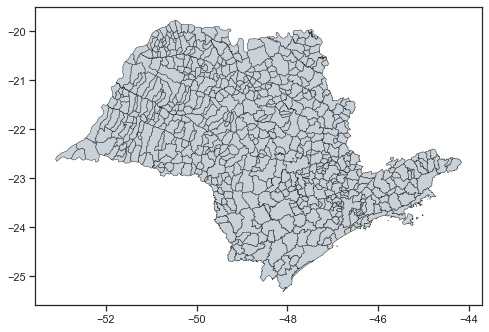

In [55]:
# Checks if map has loaded correctly
mun.plot(edgecolor='#333333', facecolor='#C8D2D8', linewidth=0.5, figsize=(8,6))

In [56]:
governador_map = mun.merge(pivota, on='codigo_ibge', how='left')

<AxesSubplot:>

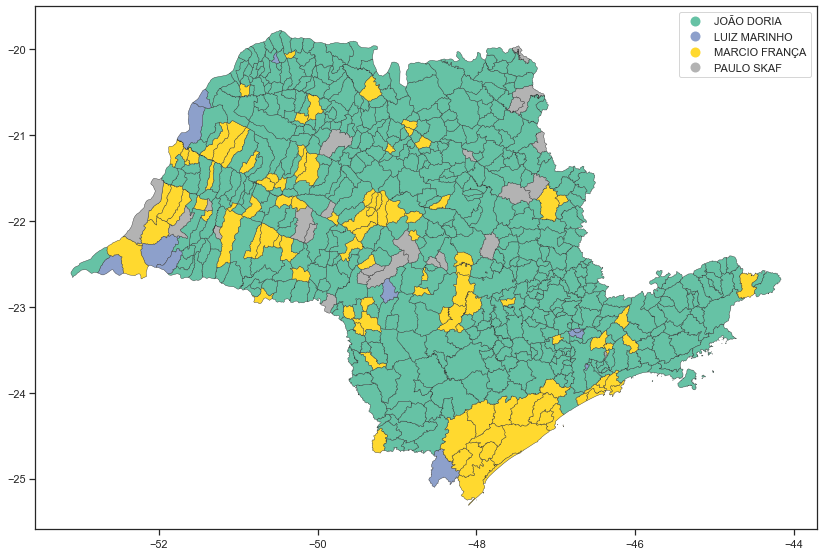

In [58]:
governador_map.plot(column='vencedor', cmap='Set2', categorical=True, figsize=(14,12),
                                     legend=True, edgecolor='#333333', linewidth=0.4)

In [59]:
# Retrives dataset for absent voters and null or blank votes

df2 = pd.read_csv('detalhe_votacao_munzona_2018_BRASIL.csv', sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [60]:
df2 = df2.query(f'SG_UF == "{chosen_uf}"')

In [61]:
df2 = df2.query(f'NR_TURNO == 1')

In [62]:
df2 = df2.query(f'DS_CARGO == "Governador"')

In [63]:
df2 = df2[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']]

In [64]:
df2 = df2.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_ABSTENCOES',
       'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'].sum().reset_index()

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_19128\4075979307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_ABSTENCOES',


In [65]:
df2.columns = ['codigo_tse', 'NM_MUNICIPIO', 'QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']

In [68]:
df2.sample(n=10)

,codigo_tse,NM_MUNICIPIO,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS
562,70815,SÃO FRANCISCO,719,193,310
145,62456,BORACÉIA,795,177,313
258,64734,GUARIBA,7060,1658,2828
534,70254,SANTA CRUZ DA CONCEIÇÃO,809,195,359
12,61123,DIRCE REIS,428,70,139
613,71838,TAUBATÉ,50340,11093,20394
273,65030,IGARAPAVA,6927,1372,2160
363,66834,MARINÓPOLIS,423,101,237
226,64092,FARTURA,3369,635,1004
76,61760,ELISIÁRIO,357,175,326


In [69]:
governador_map = governador_map.merge(df2, how='left', on='codigo_tse')

In [70]:
governador_map.columns

Index(['codigo_ibge', 'name', 'description', 'geometry', 'codigo_tse',
       'NM_MUNICIPIO_x', 'JOÃO DORIA', 'LUIZ MARINHO', 'MAJOR COSTA E SILVA',
       'MARCIO FRANÇA', 'PAULO SKAF', 'PROF. CLAUDIO FERNANDO',
       'PROFESSORA LISETE', 'RODRIGO TAVARES', 'ROGERIO CHEQUER',
       'TONINHO FERREIRA', 'vencedor', 'NM_MUNICIPIO_y', 'QT_ABSTENCOES',
       'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'],
      dtype='object')

In [71]:
governador_map = governador_map.drop(columns=['description', 'NM_MUNICIPIO_x', 'NM_MUNICIPIO_y'])

In [73]:
governador_map.sample(n=5)

,codigo_ibge,name,geometry,codigo_tse,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,vencedor,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS
109,3509601,Campo Limpo Paulista,"POLYGON ((-46.74948 -23.18014, -46.73655 -23.1...",62936,11016,4913,1889,5797,8814,47,653,1273,1127,36,JOÃO DORIA,12685,3488,8102
288,3525508,Joanópolis,"POLYGON ((-46.14366 -22.85752, -46.14166 -22.8...",66117,2469,265,272,1575,871,2,47,158,107,0,JOÃO DORIA,2182,518,988
378,3533502,Novo Horizonte,"POLYGON ((-49.27094 -21.28460, -49.25698 -21.2...",67717,8182,1781,844,2685,2961,16,230,717,263,6,JOÃO DORIA,7354,1707,2569
282,3524907,Jambeiro,"POLYGON ((-45.64031 -23.19554, -45.63496 -23.2...",65994,1325,184,125,689,653,3,42,120,90,4,JOÃO DORIA,1020,247,395
122,3510708,Cardoso,"POLYGON ((-50.03816 -19.91783, -50.01172 -19.9...",63150,2052,758,150,1248,1073,4,66,148,59,1,JOÃO DORIA,3326,581,984


In [74]:
eleitorado = governador_map.drop(columns=['vencedor'])

In [76]:
eleitorado.head()

,codigo_ibge,name,geometry,codigo_tse,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS
0,3500105,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",61018,6371,906,694,4487,3183,6,134,383,246,5,7107,1685,2491
1,3500204,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",61034,830,213,101,497,600,1,16,71,24,0,1154,225,461
2,3500303,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",61050,4696,1507,609,2215,3026,33,150,541,303,8,4634,1656,2946
3,3500402,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",61077,1427,347,149,799,771,7,55,126,134,3,1583,356,626
4,3500501,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",61093,3581,356,412,2176,1399,16,109,451,318,5,3350,631,1633


In [78]:
eleitorado['eleitores'] = eleitorado[[i for i in eleitorado.columns if i not in ['codigo_ibge', 'name', 'geometry', 'codigo_tse', 'eleitorado']]].sum(axis=1).fillna(0).astype(int)

In [81]:
eleitorado['classificados'] = eleitorado[segundo_turno].sum(axis=1).astype(int)

In [82]:
desclassificados = [i for i in candidatos if i not in segundo_turno]

In [83]:
eleitorado['desclassifiados'] = eleitorado[desclassificados].sum(axis=1).astype(int) #note the missing 'c'

In [84]:
eleitorado['brancos_nulos'] = eleitorado[['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']].sum(axis=1).astype(int)

In [86]:
eleitorado['longitude'] = eleitorado.geometry.centroid.apply(lambda x: x.x)

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_19128\1037413003.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eleitorado['longitude'] = eleitorado.geometry.centroid.apply(lambda x: x.x)


In [87]:
eleitorado['latitude'] = eleitorado.geometry.centroid.apply(lambda x: x.y)

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_19128\1566861062.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eleitorado['latitude'] = eleitorado.geometry.centroid.apply(lambda x: x.y)


In [88]:
eleitorado['centroide'] = eleitorado.geometry.centroid

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_19128\3918971167.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eleitorado['centroide'] = eleitorado.geometry.centroid


In [89]:
perfil_estado = eleitorado.drop(columns=(['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'] + candidatos))

In [90]:
perfil_estado = perfil_estado[['codigo_ibge', 'codigo_tse', 'name', 'eleitores', 
       'classificados', 'desclassifiados', 'brancos_nulos', 'QT_ABSTENCOES',
       'longitude', 'latitude', 'centroide', 'geometry']]

In [91]:
perfil_estado.columns = ['codigo_ibge', 'codigo_tse', 'Município', 'Tamanho do eleitorado', '1º e 2º colocados',
       '3º colocado em diante', 'Brancos e nulos', 'Abstenções', 'longitude',
       'latitude', 'centroid', 'geometry']

In [93]:
perfil_estado.sample(n=5)

,codigo_ibge,codigo_tse,Município,Tamanho do eleitorado,1º e 2º colocados,3º colocado em diante,Brancos e nulos,Abstenções,longitude,latitude,centroid,geometry
8,3500758,61581,Alambari,9308,1753,1115,706,1080,-47.868336,-23.548612,POINT (-47.86834 -23.54861),"POLYGON ((-47.80675 -23.48821, -47.79898 -23.4..."
598,3553708,71757,Taquaritinga,80340,13388,9489,6296,10997,-48.537399,-21.425208,POINT (-48.53740 -21.42521),"POLYGON ((-48.39103 -21.31643, -48.38117 -21.3..."
22,3502002,61395,Analândia,8640,1362,965,686,1307,-47.677597,-22.120821,POINT (-47.67760 -22.12082),"POLYGON ((-47.65762 -22.05132, -47.63593 -22.0..."
607,3554409,71897,Terra Roxa,11326,2023,1599,1231,810,-48.345504,-20.778276,POINT (-48.34550 -20.77828),"POLYGON ((-48.33783 -20.69507, -48.32005 -20.7..."
359,3532108,67431,Murutinga do Sul,7172,1135,901,639,911,-51.300643,-20.995931,POINT (-51.30064 -20.99593),"POLYGON ((-51.23727 -21.00143, -51.23960 -21.0..."


# Candidatos vencedores por município

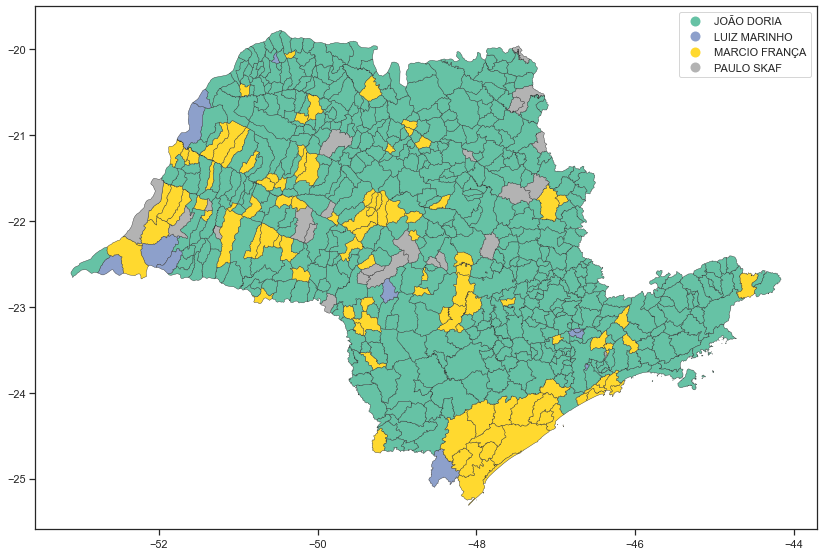

In [126]:
vencedores_map = governador_map.plot(column='vencedor', cmap='Set2', categorical=True, figsize=(14,12),
                                     legend=True, edgecolor='#333333', linewidth=0.4)

### **Mapa para referência:** [Clique aqui](http://www.sp-turismo.com/municipios-sp.htm)

In [95]:
# Cria colunas com porcentagens de votos soltos, inválidos e abstenções

perfil_estado['3º colocado em diante (%)'] = \
(perfil_estado['3º colocado em diante']/perfil_estado['Tamanho do eleitorado']*100).round(1)

perfil_estado['Brancos e nulos (%)'] = \
(perfil_estado['Brancos e nulos']/perfil_estado['Tamanho do eleitorado']*100).round(1)

perfil_estado['Abstenções (%)'] = \
(perfil_estado['Abstenções']/perfil_estado['Tamanho do eleitorado']*100).round(1)

# Votos em candidatos que não passaram ao 2º turno
**OBS:** (% do eleitorado total, incluindo abstenções)

<AxesSubplot:>

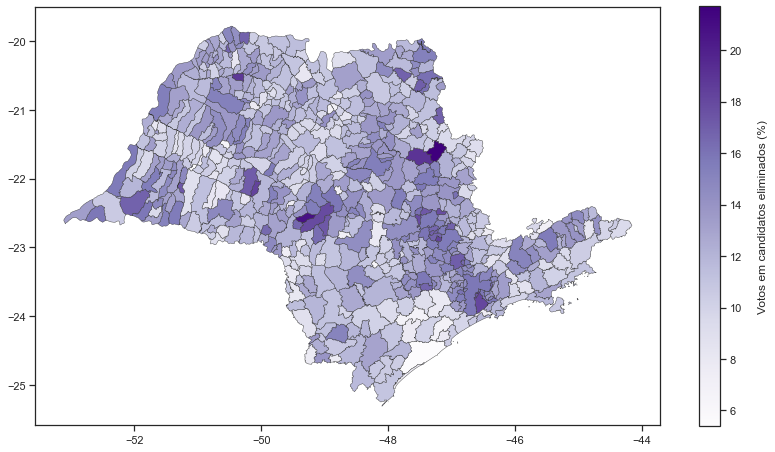

In [96]:
perfil_estado.plot(column='3º colocado em diante (%)', figsize=(14,12), cmap='Purples',
                   edgecolor='#333333', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label': "\nVotos em candidatos eliminados (%)"})

# Porcentagem de brancos e nulos
**OBS:** (% do eleitorado total, incluindo abstenções)

<AxesSubplot:>

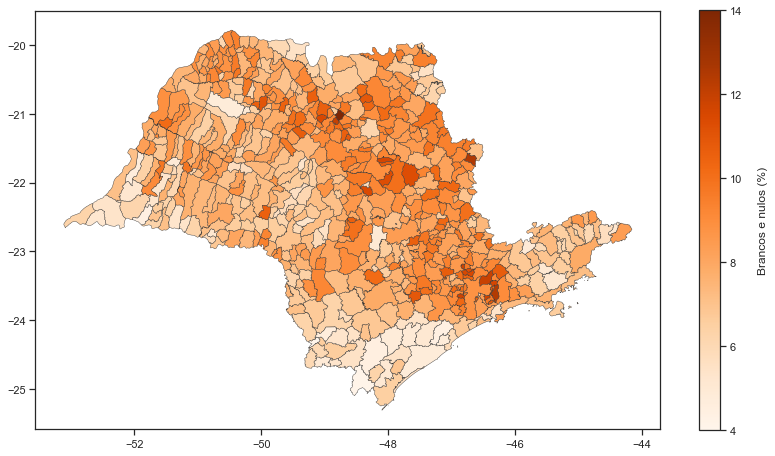

In [97]:
perfil_estado.plot(column='Brancos e nulos (%)', figsize=(14,12), cmap='Oranges', 
                   edgecolor='#333333', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label':'\nBrancos e nulos (%)'})

# Porcentagem de abstenções

<AxesSubplot:>

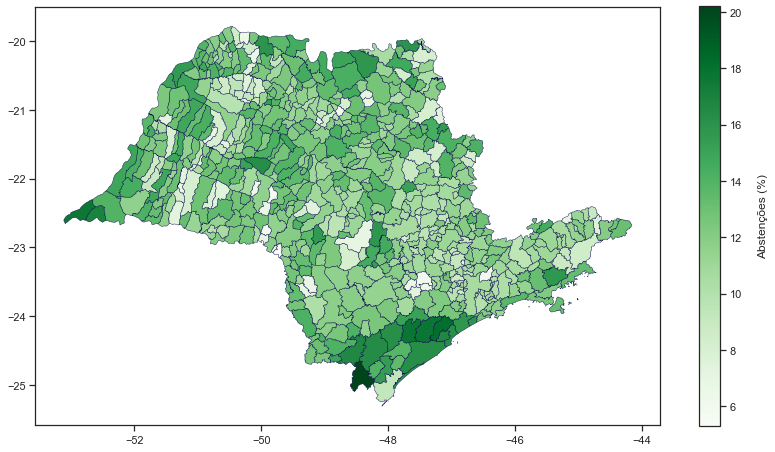

In [134]:
perfil_estado.plot(column='Abstenções (%)', figsize=(14,12), cmap='Greens',
                   edgecolor='#000044', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label':'\nAbstenções (%)'})

In [166]:
eleitorado['vencedor'] = eleitorado[candidatos].idxmax(axis=1)

In [168]:
eleitorado

,codigo_ibge,name,geometry,codigo_tse,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,...,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,eleitores,classificados,desclassifiados,brancos_nulos,longitude,latitude,centroide,vencedor
0,3500105,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",61018,6371,906,694,4487,3183,6,...,1685,2491,55396,10858,5557,4176,-51.056162,-21.576304,POINT (-51.05616 -21.57630),JOÃO DORIA
1,3500204,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",61034,830,213,101,497,600,1,...,225,461,8386,1327,1026,686,-49.652815,-21.288078,POINT (-49.65281 -21.28808),JOÃO DORIA
2,3500303,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",61050,4696,1507,609,2215,3026,33,...,1656,2946,44648,6911,6177,4602,-47.039711,-22.049605,POINT (-47.03971 -22.04960),JOÃO DORIA
3,3500402,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",61077,1427,347,149,799,771,7,...,356,626,12766,2226,1592,982,-46.691310,-21.913757,POINT (-46.69131 -21.91376),JOÃO DORIA
4,3500501,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",61093,3581,356,412,2176,1399,16,...,631,1633,28874,5757,3066,2264,-46.603049,-22.474052,POINT (-46.60305 -22.47405),JOÃO DORIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,Votorantim,"POLYGON ((-47.37268 -23.51783, -47.37047 -23.5...",72435,20056,7455,3460,7409,10067,68,...,5126,11310,163980,27465,27393,16436,-47.405992,-23.579232,POINT (-47.40599 -23.57923),JOÃO DORIA
641,3557105,Votuporanga,"POLYGON ((-50.02073 -20.33347, -50.01275 -20.3...",72451,16704,3005,1565,6924,11908,35,...,3146,6821,139202,23628,18820,9967,-49.988170,-20.458153,POINT (-49.98817 -20.45815),JOÃO DORIA
642,3557154,Zacarias,"POLYGON ((-49.99521 -21.03253, -49.98434 -21.0...",61921,569,183,41,225,342,1,...,97,305,4902,794,634,402,-50.049071,-21.124921,POINT (-50.04907 -21.12492),JOÃO DORIA
643,3557204,Chavantes,"POLYGON ((-49.68539 -22.94866, -49.68396 -22.9...",63371,1835,586,182,1719,1223,5,...,530,918,16192,3554,2242,1448,-49.726146,-23.045948,POINT (-49.72615 -23.04595),JOÃO DORIA


# Tamanho do eleitorado em cada município
**OBS**: Proporção em relação à capital

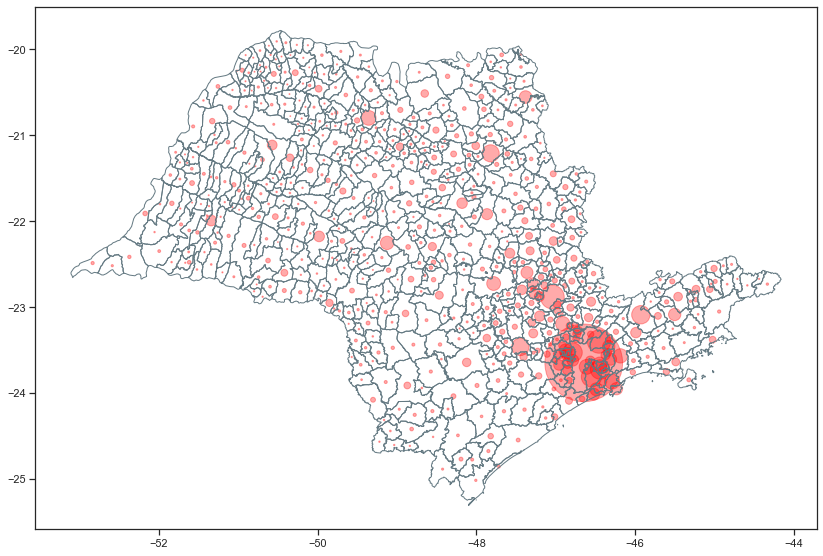

In [173]:
votantes = perfil_estado.set_geometry("centroid").\
plot(ax=mun.plot(edgecolor='#657A83',color='#ffffff00', figsize=(14,16), zorder=2), 
     markersize=perfil_estado['Tamanho do eleitorado']/3000, color='#ff000055', 
     figsize=(14,16), legend=True, zorder=1)

In [189]:
eleitorado.columns = [i.title() if i in candidatos else i.upper() for i in eleitorado.columns]

In [192]:
eleitorado.columns = [i.replace('QT_','') for i in eleitorado.columns]

In [194]:
eleitorado.columns = [i.replace('VOTOS_','') for i in eleitorado.columns]

In [196]:
eleitorado.columns = [i.replace('CLASSIFIADOS','CLASSIFICADOS') for i in eleitorado.columns]

In [205]:
eleitorado.columns = [i.replace('ABSTENCOES', 'Abstenções') for i in eleitorado.columns]

In [210]:
eleitorado.columns = [i.title() if i in ['BRANCOS', 'NULOS', 'ELEITORES', 'CLASSIFICADOS', 'DESCLASSIFICADOS', 'VENCEDOR'] else i for i in eleitorado.columns]

In [214]:
eleitorado.columns = [i.replace('BRANCOS_NULOS', 'Brancos e nulos').replace('NAME','Município') for i  in eleitorado.columns]

In [219]:
eleitorado.columns = [i.lower() if i in ['GEOMETRY', 'CENTROIDE'] else i for i in eleitorado.columns]

In [223]:
eleitorado.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CODIGO_IBGE             645 non-null    object  
 1   Município               645 non-null    object  
 2   geometry                645 non-null    geometry
 3   CODIGO_TSE              645 non-null    Int64   
 4   João Doria              645 non-null    Int64   
 5   Luiz Marinho            645 non-null    Int64   
 6   Major Costa E Silva     645 non-null    Int64   
 7   Marcio França           645 non-null    Int64   
 8   Paulo Skaf              645 non-null    Int64   
 9   Prof. Claudio Fernando  645 non-null    Int64   
 10  Professora Lisete       645 non-null    Int64   
 11  Rodrigo Tavares         645 non-null    Int64   
 12  Rogerio Chequer         645 non-null    Int64   
 13  Toninho Ferreira        645 non-null    Int64   
 14  Abstenções        

In [227]:
candidatos_t = [i.title() for i in candidatos]

In [240]:
vencedor_municipio = eleitorado[['CODIGO_IBGE', 'CODIGO_TSE', 'Município', 'geometry', 'Vencedor'] + candidatos_t + ['Brancos e nulos', 'Abstenções']]

In [241]:
vencedor_municipio

,CODIGO_IBGE,CODIGO_TSE,Município,geometry,Vencedor,João Doria,Marcio França,Paulo Skaf,Luiz Marinho,Major Costa E Silva,Rogerio Chequer,Rodrigo Tavares,Professora Lisete,Prof. Claudio Fernando,Toninho Ferreira,Brancos e nulos,Abstenções
0,3500105,61018,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",JOÃO DORIA,6371,4487,3183,906,694,246,383,134,6,5,4176,7107
1,3500204,61034,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",JOÃO DORIA,830,497,600,213,101,24,71,16,1,0,686,1154
2,3500303,61050,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",JOÃO DORIA,4696,2215,3026,1507,609,303,541,150,33,8,4602,4634
3,3500402,61077,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",JOÃO DORIA,1427,799,771,347,149,134,126,55,7,3,982,1583
4,3500501,61093,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",JOÃO DORIA,3581,2176,1399,356,412,318,451,109,16,5,2264,3350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,72435,Votorantim,"POLYGON ((-47.37268 -23.51783, -47.37047 -23.5...",JOÃO DORIA,20056,7409,10067,7455,3460,1560,2912,1840,68,31,16436,10696
641,3557105,72451,Votuporanga,"POLYGON ((-50.02073 -20.33347, -50.01275 -20.3...",JOÃO DORIA,16704,6924,11908,3005,1565,794,1055,449,35,9,9967,17186
642,3557154,61921,Zacarias,"POLYGON ((-49.99521 -21.03253, -49.98434 -21.0...",JOÃO DORIA,569,225,342,183,41,20,38,7,1,2,402,621
643,3557204,63371,Chavantes,"POLYGON ((-49.68539 -22.94866, -49.68396 -22.9...",JOÃO DORIA,1835,1719,1223,586,182,74,101,65,5,6,1448,852


In [247]:
vencedor_municipio['Vencedor'] = vencedor_municipio.Vencedor.str.title()

C:\Users\rgarcia\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [252]:
vencedor_municipio.sample(n=5)

,CODIGO_IBGE,CODIGO_TSE,Município,geometry,Vencedor,João Doria,Marcio França,Paulo Skaf,Luiz Marinho,Major Costa E Silva,Rogerio Chequer,Rodrigo Tavares,Professora Lisete,Prof. Claudio Fernando,Toninho Ferreira,Brancos e nulos,Abstenções
98,3508702,62758,Caconde,"POLYGON ((-46.61959 -21.43474, -46.61481 -21.4...",João Doria,3192,2536,1120,770,205,265,175,105,10,4,2080,4162
388,3534500,67911,Oscar Bressane,"POLYGON ((-50.25502 -22.21379, -50.25100 -22.2...",João Doria,745,471,233,108,43,17,36,14,0,0,358,720
25,3502309,61450,Anhembi,"POLYGON ((-48.17573 -22.62635, -48.15991 -22.6...",Marcio França,627,1794,518,182,102,16,56,17,0,0,565,1787
202,3517802,64572,Guaraçaí,"POLYGON ((-51.22503 -20.84855, -51.21258 -20.8...",Marcio França,1112,1248,735,449,101,67,80,21,4,3,1208,1759
163,3514809,63975,Eldorado,"POLYGON ((-48.11379 -24.22120, -48.12281 -24.2...",Marcio França,1879,1956,1206,1626,58,38,121,38,1,3,1076,3897


In [244]:
tamanho_eleitorado = eleitorado[['Município', 'Eleitores', 'LONGITUDE', 'LATITUDE']]

In [273]:
desclassificados_geo = perfil_estado[['Tamanho do eleitorado', '3º colocado em diante', '3º colocado em diante (%)', 'geometry']]
desclassificados_pts = perfil_estado[['Tamanho do eleitorado', '3º colocado em diante', '3º colocado em diante (%)', 'latitude', 'longitude']]

brancos_nulos_geo = perfil_estado[['Tamanho do eleitorado', 'Brancos e nulos', 'Brancos e nulos (%)', 'geometry']]
brancos_nulos_pts = perfil_estado[['Tamanho do eleitorado', 'Brancos e nulos', 'Brancos e nulos (%)', 'longitude', 'latitude']]

abstencoes_geo = perfil_estado[['Tamanho do eleitorado', 'Abstenções', 'Abstenções (%)', 'geometry']]
abstencoes_pts = perfil_estado[['Tamanho do eleitorado', 'Abstenções', 'Abstenções (%)', 'longitude', 'latitude']]

In [274]:
for_export_geo = ['vencedor_municipio', 'desclassificados_geo', 'brancos_nulos_geo', 'abstencoes_geo']

In [275]:
for_export_pts = ['tamanho_eleitorado', 'desclassificados_pts', 'brancos_nulos_pts', 'abstencoes_pts']

In [276]:
os.getcwd()

'C:\\Users\\rgarcia\\Documents\\data'

In [271]:
for i in for_export_geo:
    exec(f'{i}.to_file("{chosen_uf}_{i}.geojson", driver="GeoJSON")')

In [277]:
for i in for_export_pts:
    exec(f'{i}.to_csv("{chosen_uf}_{i}.csv", index=False)')

In [279]:
os.listdir()

['bands.csv',
 'Biomas',
 'brasil_coverage_2021.tif',
 'brasil_coverage_2021.tif.aux.xml',
 'brazil-states.geojson',
 'brazil-states_lo_res.json',
 'brazil_forests.pgw',
 'candidato_redes_total.csv',
 'cargo.csv',
 'consulta_cand_2018_BRASIL.csv',
 'consulta_cand_2022_BRASIL.csv',
 'consulta_cand_2022_BRASIL_08_19.csv',
 'consulta_cand_2022_BRASIL_OLD.csv',
 'consulta_cand_2022_BRASIL_VEI.csv',
 'Códigos_Classes_Mapbiomas_Coleção_7.pdf',
 'dep_est_partido.csv',
 'dep_est_uf.csv',
 'dep_fed_partido.csv',
 'dep_fed_uf.csv',
 'Desmate_minera.csv',
 'Desmate_mineracao.csv',
 'detalhe_votacao_munzona_2018_BRASIL.csv',
 'forests_brazil.pgw',
 'forest_colormap.clr',
 'forest_only.clr',
 'geojs-100-mun.geojson',
 'Haddad_Bolsonaro_Municipios.xlsx',
 'Hidrovias.json',
 'historico.csv',
 'lista_prestadores_2022_brasil.csv',
 'mapbiomas.clr',
 'mapbiomas.qgz',
 'mapbiomas_col6.qgz',
 'Mapbiomas_colormap.csv',
 'muda_cor_candidato.csv',
 'muda_cor_partido.csv',
 'municipios_hires.geojson',
 'munic

In [280]:
import brfy

In [282]:
brfy.paleta(candidatos)

João Doria: #3395ea
Marcio França: #fc4f71
Paulo Skaf: #F1CF00
Luiz Marinho: #125d9d
Major Costa E Silva: #ffc0ce
Rogerio Chequer: #4EC4B2
Rodrigo Tavares: #d14664
Professora Lisete: #F2895A
Prof. Claudio Fernando: #f8c694
Toninho Ferreira: #9575ed


In [285]:
mun.bounds

,minx,miny,maxx,maxy
3265,-51.177896,-21.765341,-50.963957,-21.398884
3266,-49.745623,-21.363649,-49.567108,-21.196543
3267,-47.233326,-22.147109,-46.860744,-21.967023
3268,-46.757658,-22.016902,-46.612012,-21.817933
3269,-46.658478,-22.515766,-46.548360,-22.434958
...,...,...,...,...
3905,-47.518112,-23.649525,-47.296387,-23.517835
3906,-50.153906,-20.581219,-49.851466,-20.316218
3907,-50.150842,-21.226196,-49.958218,-20.996866
3908,-49.818913,-23.147914,-49.664988,-22.934878
